# Selección de modelo

El objetivo de realizar selección de modelo es, a partir de una serie de datos $(x,y)$ y cierta clase de hipótesis $\mathcal{H}$. Encontrar el $h\in \mathcal{H}$ que minimiza el error $e(h)=P_{D}[h(x) \neq y]$. Claramente la hipótesis $h$ que minimiza el error en los datos sobre una cantidad suficiente de datos, produce un error $e(h)$ pequeño. El objetivo es balancear la complejidad de $\mathcal{H}$ con el ajuste de $h\in \mathcal{H}$ a los datos de entrenamiento. Es claro que una hipótesis muy simple puede no contener una buena aproximación a la función que queremos aprender, mientras que una $h$ muy compleja puede ajustarse muy bien a los datos pero no ser tan buena en la generalización a nuevos datos. Esto se vuelve particularmente importante cuando se tienen pocos datos o estos resultan muy ruidosos. 



# Estrategias para selección de modelo

Es importante notar que la complejidad de la clase de modelos es una variable a determinar por el algoritmo de aprendizaje. La selección de modelo se realiza usualmente de la siguiente manera:
- Se selecciona una función candidata $h_i$ de cierta clase $H_i$, para esto es conveniente, en general, minimizar el error empírico. 
- Se utiliza algún criterio para seleccionar una de las $h\in {h_1,h_2,...}$ de manera que el error $e(h)$ sea lo suficientemente pequeño. 



# 1. Validación cruzada

Cuando se evalúan diferentes configuraciones de un modelo general, lo que se hace es evaluar diferentes "hiperparámetros" para los estimadores. Tales como $\lambda$ en el caso de regresión lineal con regularización que se realizó previamente. Cuando se escoje un valor de un hiperparáemtetro escogido manuealmente, existe la posibilidad de realizar sobreajuste (overfitting) del conjunto de prueba debido a que los hiperparámetros pueden ser manipulados de manera que el estimador se comporte óptimamente, de manera que se introduce un conocimiento al modelo que invalidala idea de tener un desempeño de generalización. Para resolver este problema, es posible crear OTRO subconjunto de datos de manera que este se pueda mantener "afuera" del conjunto de prueba y funcione como un conjunto de validación durante el proceso de entrenamiento. 

Para realizar validación cruzada, se realiza una estimación directa de $e(h_i)$. Para esto, se dividen los datos en conjuntos $(X_{train},Y_{train})$ y $(X_{test},Y_{test})$, donde cada conjunto contiene $1-\alpha$ y $alpha$ veces la cantidad total de datos. 
Con estos datos se halla la hipótesis candidata $h_d\in \mathcal{H}_d$ minimizando el error empírico en el conjunto de datos de entrenamiento (X_{train},Y_{train}). Posteriormente, se selecciona la hipótesis candidata con el menor error empírico en $(X_{test},Y_{test})$. 



\begin{equation}
h_{d^*}={argmin}_{h_i}{\hat{e}_{(X_{test},Y_{test})} (h_d)}
\end{equation}

Claramente, la selección de $\alpha$ también tiene consecuencias sobre la estimación y el modelo obtenido. Si se selecciona un $\alpha$ muy pequeño, es posible tener una estimación pobre de $e(h)$ debido a que no se tienen suficientes datos para estimar el error empírico en un conjunto de prueba. Si se selecciona un $\alpha$ muy grande, se corre el riesgo de realizar un aprendizaje pobre debido a que no se tienen los suficientes datos para entrenar el modelo. El criterio de Chernoff es útil determinar qué cantidad $n$ de datos es necesaria para estimar $e(h)$ con precisión $\epsilon$ y confianza $1-\delta$:

\begin{equation}
n \geq \frac{1}{2\epsilon^2} \ln{\frac{2}{\delta}}
\end{equation}

Sin embargo, el estimativo de $e(h_d)$ usualmente es ruidoso, por lo que es importante considerar diferentes alternativas para realizar \textit{validación cruzada}.

Sin embargo, al realizar particiones de los datos, se reduce el número de muestras que pueden ser utilizadas para aprender el modelo. Una solución a este problema se llama "validación cruzada (CV)". 




In [28]:
#EJEMPLO: SCORES DE CROSS-VALIDATION
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Se cargan los datos
iris = datasets.load_iris()

#Se crean las separaciones de train y test.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

#Se crea un objeto de tipo clasificador
clf = svm.SVC(kernel='linear', C=1)

#Se crea un objeto cross_val_score que recibe como parámetro el modelo, 
#los datos y la cantidad de validaciones cruzadas

scores = cross_val_score(clf, X_train , y_train, cv=5)

print("Precisiones en cada subconjunto",scores)
print("Precisión media: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(".......")


#Se puede modificar el tipo de scoring que se realiza, para un conjunto de datos balanceado el resultado es muy similar
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')


print("Precisiones en cada subconjunto",scores)
print("Precisión media: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Precisiones en cada subconjunto [0.95454545 1.         1.         0.95238095 0.94736842]
Precisión media: 0.97 (+/- 0.05)
.......
Precisiones en cada subconjunto [0.95555556 1.         1.         0.95008913 0.94747475]
Precisión media: 0.97 (+/- 0.05)


#### Iteradores
También es posible utilizar diferentes estrategias de validación cruzada pasando un objeto de tipo iterador (por defecto scikit-learn utilizará KFold o StratifiedKFold)

In [32]:
from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

scores=cross_val_score(clf, X_train, y_train, cv=cv)  

print("Precisiones en cada subconjunto",scores)
print("Precisión media: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Precisiones en cada subconjunto [1.      0.9375  0.96875 0.9375  0.9375 ]
Precisión media: 0.96 (+/- 0.05)


# Validación cruzada k-multiple

La idea es obtener un mejor estimativo de $e(h)$. Para esto, teniendo una clase $\mathcal{H}$, el conjunto de datos $S=(X,Y)$ se divide en $S_1,S_2,...,S_k$. Para cada $i=1,2,...k$ se halla $h_i$ minimizando el error empírico en $\cup_{j\neq i} S_j$. Luego, se estima el error calculando el error empírico $\hat{e}_{S_i}(h_i)$. Luego se realiza un promedio de los valores obtenidos 

\begin{equation}
\hat{e}(h_d)=\frac{1}{k} \sum_{i=1}^{k}{\hat{e}s_i (h_i)}
\end{equation}

Para el $d^*$ que corresponde "fold" con menor valor de riesgo empírico, se halla $h$ minimizando el error empírico en $S$. Es importante mencionar que la validación cruzada k-fold es un proceso costoso computacionalmente y carece de soporte teórico, sin embargo, es ampliamente usado en la práctica. 

## K fold y Leave-one-out.
En k-fold se segmentan los datos en $k$ grupos, se corren los algoritmos en $k-1$ grupos y se evalúa el riesgo del último grupo. Se repiite esto hasta que todos los grupos se hallan entrenando, por lo que se tienen $k$ números de errores que se deben promediar. Leave-one-out es el caso en el que se tiene $k=n$. La idea es que este método es más robusto, dado que se entrena en una mayor cantidad de datos y todavía se tienen promedios del riesgo estimado. el reto es que ahora se está reutilizando la información en diferentes entrenamientos y conjuntos de validación por lo que los términos en los promedios no son independientes. [1]




In [41]:
import numpy as np
from sklearn.model_selection import KFold

X = np.random.uniform(size=100)
kf = KFold(n_splits=4)

for train, test in kf.split(X): print("%s %s" % (train, test))


[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99] [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24

# Comparación de comportamiento de objetos de validación cruzada

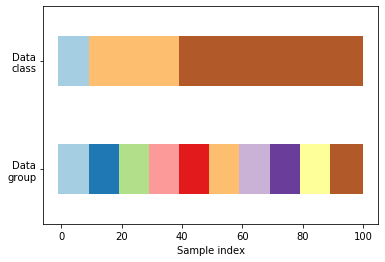

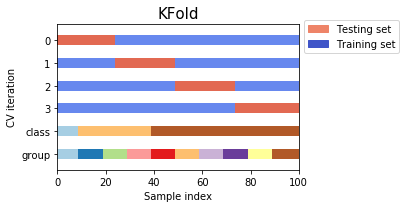

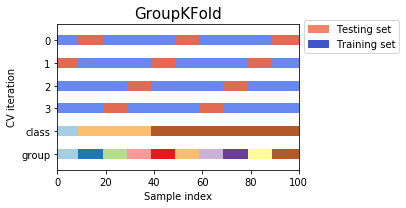

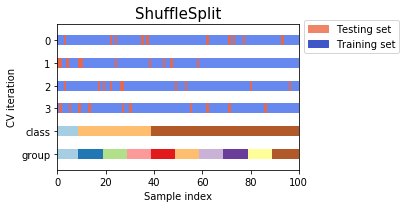

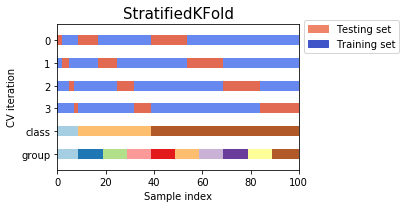

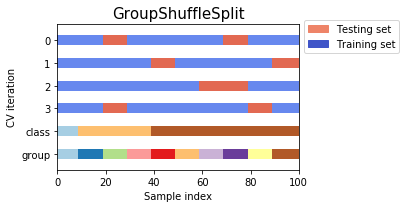

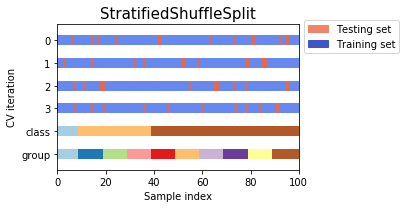

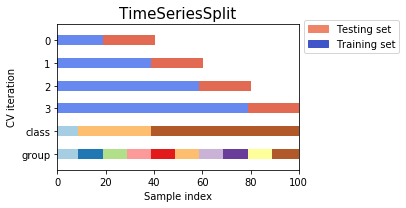

In [43]:
#Tomado de https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html

from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

# Aplicaciones: 

## Búsqueda de parámetros utilizando gridsearch:
Scikit-learn incorpora un objeto que, dados unos datos, calcula el score durante el ajuste de cierto estimador o parámetro y escoge los parámetros que maximizan el score de validación cruzada. Este objeto toma un estimado durante la construcción y devuelve un estimador. 


In [47]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

svc = svm.SVC(kernel='linear')

Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1,iid=True,cv=5)
clf.fit(X_train,y_train)        

#Se puede recuperar el mejor parámetro
print(clf.best_estimator_.C)

#También se puede recuperar el score
clf.score(X_test,y_test)      


0.1


0.9333333333333333

In [51]:
#Tomado de: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("#hyper-parameters para %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Mejores parámetros encontrados:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Reporte detallado de clasificación:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

#hyper-parameters para precision

Mejores parámetros encontrados:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Reporte detallado de clasificación:

The model is trained on the full development set.
The scores are computed on the full evalua

## Eliminación de características:

Es posible realizar una eliminación recursiva de características con una sintonización automática del número de características seleccionadas con cross-validation. Para realizar esta aplicación primero es importante presentar algunas funciones útiles. 

### Nuevo! make_classification

Genera un objeto para solucionar un problema multiclase, en general. Este objeto soluciona el problema creando clusters de puntos normalmente distribuidos sobre los vértices de un n_informativo hipercubo con lados de tamaño $2*class_sep$. Introduce interdependencia entre las características y añade diferentes tipos de ruido a los datos. 
to the data.

### Nuevo! RFECV 
Realiza RANKING con eliminación recursiva y validación cruzada de características de las mejores características de los modelos. 


Número óptimo de características : 3


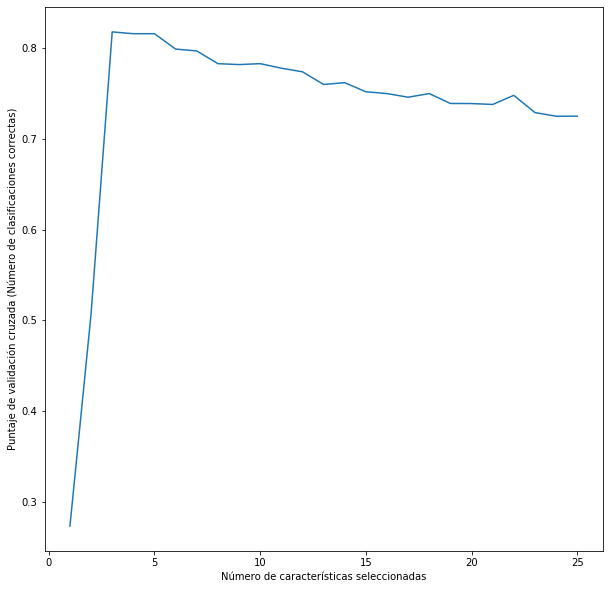

In [52]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Crea un problema de clasificación, con 3 n_informativos
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Crea un objeto de clasificador.
svc = SVC(kernel="linear")

# Crea un objeto de ranking, el ESTIMADOR buscado es el clasificador SVC y el criterio es acuracy.
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Número óptimo de características : %d" % rfecv.n_features_)

# Número de features en función del score de cross validation
plt.figure(figsize=(10,10))
plt.xlabel("Número de características seleccionadas")
plt.ylabel("Puntaje de validación cruzada (Número de clasificaciones correctas)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()